# Plotting netCDF data on maps 

In [1]:
from    netCDF4 import Dataset
import  matplotlib.pyplot  as plt
import  numpy as np
from    mpl_toolkits.basemap import Basemap
import  wget
import  os
from    pathlib import Path

#### Download the netCDF file 

In [2]:
# Set file names
filename = 'ECMWF_ERA-40_subset.nc'
g16url   = 'https://github.com/karimbahgat/pyncf/raw/master/' + filename
download_path = str(Path.home() / "Downloads")

In [3]:
# Download

if ( os.path.isfile(download_path + '/' + filename) ):
    print( download_path + '/' + filename + "File already exist")
else:     
    print("Downloading file ...") 
    #print("path:", download_path + '/' + filename)
    download_file  = wget.download(g16url, out=download_path)
    print("\nDownload complete")

100% [........................................................................] 22165040 / 22165040
Download complete


In [4]:
# Load data
nc_data  = Dataset(download_path + '/' + filename, "r" )

latitude  = nc_data.variables ['latitude'][:]
longitude = nc_data.variables ['longitude'][:]
time      = nc_data.variables ['time'][:]
# 2 meter temperature
temp_2m   = nc_data.variables ['p2t'][:]
# mean sea level pressure
mean_pressure = nc_data.variables ['msl'][:]
# 10m u-component of winds
u10m = nc_data.variables ['p10u'][:]
# 10 v-component of winds
v10m = nc_data.variables ['p10v'][:]

## Clean up
nc_data.close()
nc_data = None

Now, create a Basemap object starting from the point (40N, 83W), extending to 20 degree W-E and 10 degress N-S

In [5]:
map = Basemap (projection = 'merc', resolution = 'i', 
               llcrnrlon  = -93.0,
               llcrnrlat  = 35,
               urcrnrlon  = -73,
               urcrnrlat  = 45.0,)

Next, add borders and coastlines to the map

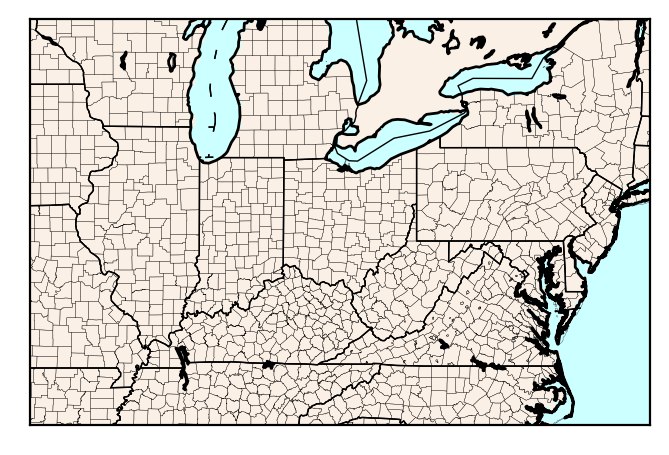

In [6]:
fig  = plt.figure (figsize= (4,4), dpi = 200) # dpi = 400
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask (land_color = 'Linen', ocean_color = '#CCFFFF')
map.drawcounties ()

plt.show()

#### Add latitude and longitude lines to the map
Next, re-initialize the map, and add latitude and longitude lines 

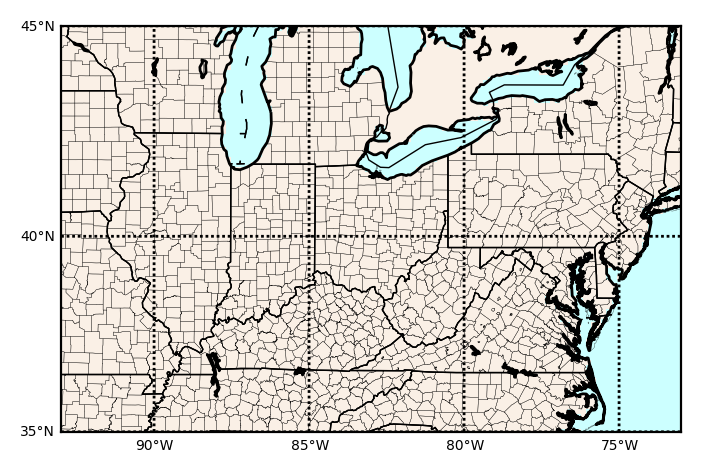

In [7]:
fig  = plt.figure (figsize= (4,4), dpi = 200) # dpi = 400
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask (land_color = 'Linen', ocean_color = '#CCFFFF')
map.drawcounties ()

parallels = np.arange (30, 50, 5.0)
meridians = np.arange (-95, -70, 5.0)
map.drawparallels (parallels, labels = [1, 0, 0, 0], fontsize = 5)
map.drawmeridians (meridians, labels = [0, 0, 0, 1], fontsize = 5)

#from IPython.display import display
#display(fig)
plt.show()

To repare the map for data plotting, one need to transform the latitude and longitude coordinates. </br>

In [8]:
longitude,  latitude  = np.meshgrid ( longitude - 180, latitude)
x_coor, y_coor = map (longitude,  latitude)

Then, plot the netCDF data on the map

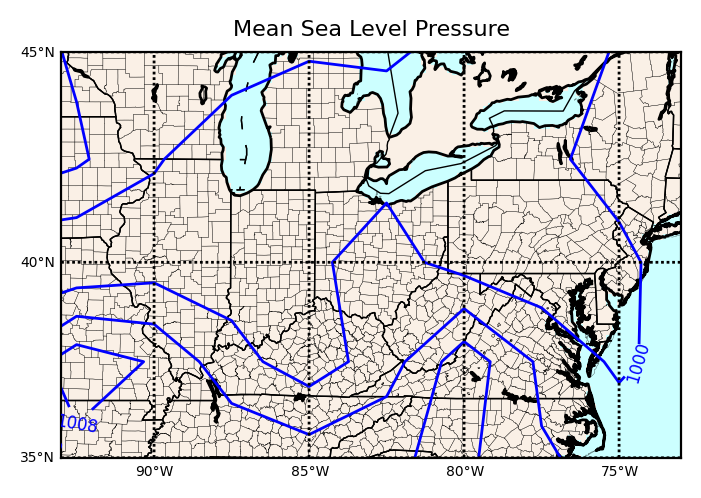

In [9]:
fig  = plt.figure (figsize= (4,4), dpi = 200) # dpi = 400
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask (land_color = 'Linen', ocean_color = '#CCFFFF')
map.drawcounties ()

parallels = np.arange (30, 50, 5.0)
meridians = np.arange (-95, -70, 5.0)
map.drawparallels (parallels, labels = [1, 0, 0, 0], fontsize = 5)
map.drawmeridians (meridians, labels = [0, 0, 0, 1], fontsize = 5)


clevs = np.arange (960, 1040, 4)
cs    = map.contour (x_coor, y_coor, mean_pressure [0, : , :]/100, clevs, colors='blue', linewidths=1)

plt.clabel(cs, fontsize=6, inline=1) # contour labels
plt.title('Mean Sea Level Pressure', fontsize=8)
plt.show()

## Plot temperature

Plot the temperature data from the netCDF dataset

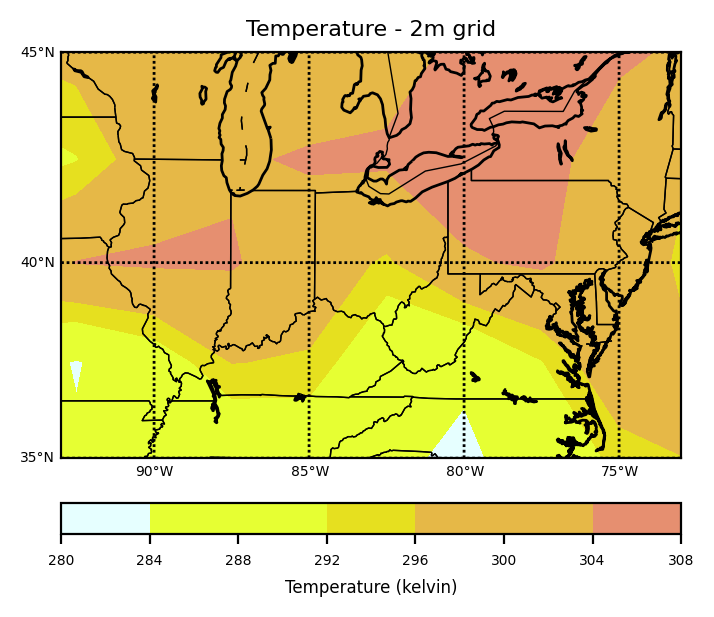

In [10]:
fig  = plt.figure (figsize= (4,4), dpi = 200) # dpi = 400
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask (land_color = 'Linen', ocean_color = '#CCFFFF')
map.drawcounties ()

parallels = np.arange (30, 50, 5.0)
meridians = np.arange (-95, -70, 5.0)
map.drawparallels (parallels, labels = [1, 0, 0, 0], fontsize = 5)
map.drawmeridians (meridians, labels = [0, 0, 0, 1], fontsize = 5)


from matplotlib.colors import LinearSegmentedColormap

cmap1 = LinearSegmentedColormap.from_list("my_colormap", 
            ((0.9,1,1), (0.9,1,0.5), (0.9,1,0),(0.9,0.9,0.1),(0.9,0.8,0.2),(0.9,0.7,0.3), (0.9,0.6,0.4), (0.9,0.5,0.5), (0.9,0,0)), 
                                          N=6, gamma=1.0)

cbarticks=np.arange(280,310,4.0)

temperature = map.contourf (x_coor, y_coor, temp_2m [4, : , :], cbarticks, vmin=280,vmax=315 , cmap=cmap1)  # cmap=cmap1 

cbar   = fig.colorbar (temperature, orientation = 'horizontal' , pad=0.075) # pad=0.05

cbar.set_ticks(ticks=cbarticks)
cbar.set_label ("Temperature (kelvin)", fontsize=6)
cbar.ax.tick_params(labelsize=5) 

plt.title      ("Temperature - 2m grid" , fontsize=8)
plt.show()


# REF
# 1. How to specify colorbar range and keep it regardless of plotting values
# https://stackoverflow.com/questions/50700325/how-to-specify-colorbar-range-and-keep-it-regardless-of-plotting-values
# 2. Basemap - Custom colormaps
# https://basemaptutorial.readthedocs.io/en/latest/cmap.html
# 3. Choosing Colormaps in Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 4. RGB Color Examples
# https://www.tug.org/pracjourn/2007-4/walden/color.pdf

## Save the plot to disk

File saved at the local disk


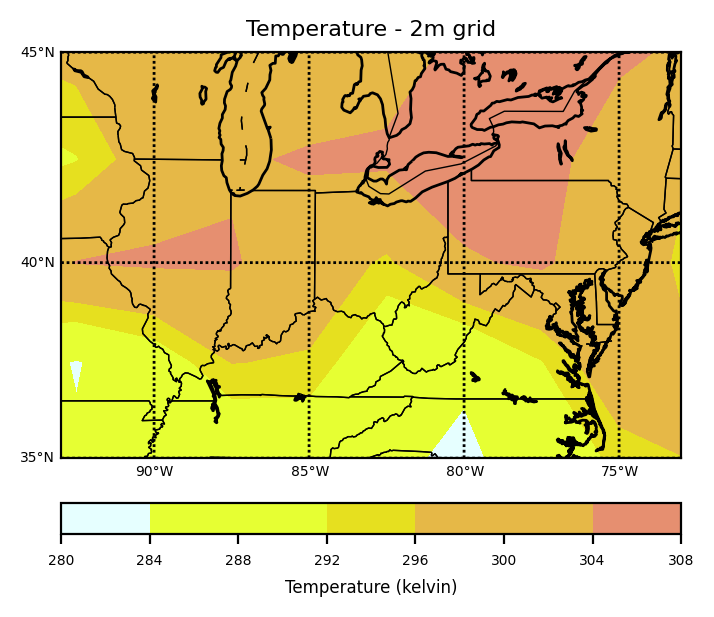

In [11]:
fig  = plt.figure (figsize= (4,4), dpi = 200) # dpi = 400
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask (land_color = 'Linen', ocean_color = '#CCFFFF')
map.drawcounties ()

parallels = np.arange (30, 50, 5.0)
meridians = np.arange (-95, -70, 5.0)
map.drawparallels (parallels, labels = [1, 0, 0, 0], fontsize = 5)
map.drawmeridians (meridians, labels = [0, 0, 0, 1], fontsize = 5)

from matplotlib.colors import LinearSegmentedColormap
cmap1 = LinearSegmentedColormap.from_list("my_colormap", 
            ((0.9,1,1), (0.9,1,0.5), (0.9,1,0),(0.9,0.9,0.1),(0.9,0.8,0.2),(0.9,0.7,0.3), (0.9,0.6,0.4), (0.9,0.5,0.5), (0.9,0,0)), 
                                          N=6, gamma=1.0)
cbarticks=np.arange(280,310,4.0)
temperature = map.contourf (x_coor, y_coor, temp_2m [4, : , :], cbarticks, vmin=280,vmax=315 , cmap=cmap1)  # cmap=cmap1 
cbar   = fig.colorbar (temperature, orientation = 'horizontal' , pad=0.075) # pad=0.05

cbar.set_ticks(ticks=cbarticks)
cbar.set_label ("Temperature (kelvin)", fontsize=6)
cbar.ax.tick_params(labelsize=5) 
plt.title      ("Temperature - 2m grid" , fontsize=8)
#plt.show()  # Can not use plot / save twice. 

# Save to a local folder
filename = 'Temperature_2m.png'
download_path = str(Path.home() / "Downloads")
plt.savefig(download_path + '/' + filename)
print("File saved at the local disk")

filename = download_path = None